In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
prices = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# from Kaggle
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 2
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    #new_df = df[df[col_name] > lower]

    return new_df

for col in prices:
    df = std_based(col,df)

df.shape
#df['Year'] = df['Year'].astype(int)

(14841, 11)

In [4]:
one_hot = pd.get_dummies(df,columns=['Platform','Genre','Publisher'])
one_hot.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_2600,Platform_3DO,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
551,552,The Legend of Zelda: A Link to the Past,2002.0,1.75,0.52,0.33,0.10,2.70,0,0,...,0,0,0,0,0,0,0,0,0,0
588,589,Streets of Rage,1990.0,1.86,0.55,0.11,0.08,2.60,0,0,...,0,0,0,0,0,0,0,0,0,0
601,602,Sonic Adventure 2 Battle,2001.0,1.70,0.59,0.21,0.07,2.56,0,0,...,0,0,0,0,0,0,0,0,0,0
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,2003.0,1.84,0.56,0.00,0.09,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0
619,620,Mortal Kombat: Deadly Alliance,2002.0,1.81,0.52,0.00,0.15,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
one_hot.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_2600,Platform_3DO,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
551,552,The Legend of Zelda: A Link to the Past,2002.0,1.75,0.52,0.33,0.10,2.70,0,0,...,0,0,0,0,0,0,0,0,0,0
588,589,Streets of Rage,1990.0,1.86,0.55,0.11,0.08,2.60,0,0,...,0,0,0,0,0,0,0,0,0,0
601,602,Sonic Adventure 2 Battle,2001.0,1.70,0.59,0.21,0.07,2.56,0,0,...,0,0,0,0,0,0,0,0,0,0
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,2003.0,1.84,0.56,0.00,0.09,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0
619,620,Mortal Kombat: Deadly Alliance,2002.0,1.81,0.52,0.00,0.15,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold

# Get targets
y_na = one_hot['NA_Sales']
y_eu = one_hot['EU_Sales']
y_jp = one_hot['JP_Sales']
y_other = one_hot['Other_Sales']
y_global = one_hot['Global_Sales']

# Get features
x = one_hot.drop(columns=['Rank','Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])

In [7]:
x.head()

,Year,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
551,2002.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
588,1990.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
601,2001.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
617,2003.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
619,2002.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train_na, x_test_na, y_train_na, y_test_na = train_test_split(x, y_na,test_size=.2,train_size=.8)
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test_split(x, y_eu,test_size=.2,train_size=.8)
x_train_jp, x_test_jp, y_train_jp, y_test_jp = train_test_split(x, y_jp,test_size=.2,train_size=.8)
x_train_other, x_test_other, y_train_other, y_test_other = train_test_split(x, y_other,test_size=.2,train_size=.8)
x_train_global, x_test_global, y_train_global, y_test_global = train_test_split(x, y_global,test_size=.2,train_size=.8)

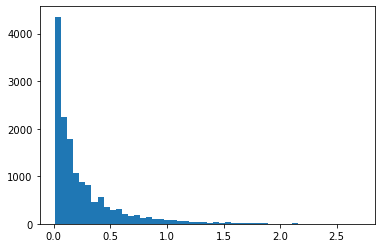

In [9]:
import matplotlib.pyplot as plt
plt.hist(y_global,50)
plt.show()

In [10]:
from xgboost import XGBRegressor
# Create model
model = XGBRegressor()

# Evaluate model
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores = cross_val_score(model, x_train_na, y_train_na, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=1, error_score='raise')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


In [11]:
# Performance with Negative Mean Absolute Error
print('NMAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

NMAE: -0.114 (0.004)


In [12]:
# Fit model to dataset
model.fit(x_train_na,y_train_na)
y_pred_na = model.predict(x_test_na)

C:\Users\Kevin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [13]:
from sklearn.metrics import mean_absolute_error
print('MAE: %r' % mean_absolute_error(y_test_na,y_pred_na))

MAE: 0.11263862192363747


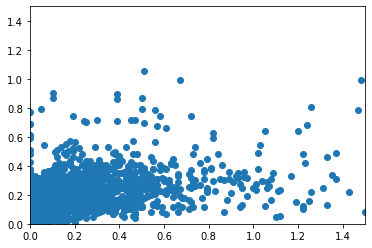

In [14]:
plt.plot(y_test_na,y_pred_na,'o')
plt.axis([0,1.5,0,1.5])
plt.show()